##      map Search

In [1]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [2]:
dictionary = {}

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
graph = connection

In [9]:
g = nx.Graph(graph)

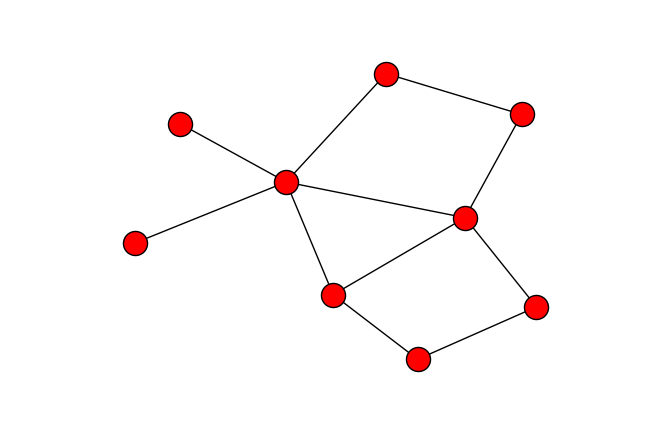

In [8]:
nx.draw(g)

# 最短路径

In [11]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)

# 广度优先

In [12]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors
                
        seen.add(froniter)

In [13]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

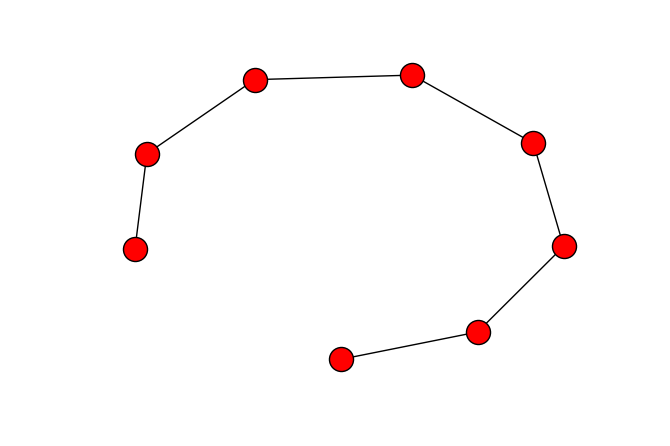

In [14]:
nx.draw(nx.Graph(connection_2))

In [17]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


# 深度优先

In [18]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

# rule based & sentence generation

In [19]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [21]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [22]:
import random

In [27]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [28]:
g = parse_grammar(grammar)

In [29]:
g

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [30]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [31]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [47]:
gene(g)

'一个女人看着一个桌子'

In [48]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

7+2-8/4
5-8+2*9
0*5/5-1
2+8*6*6
4*1+4/1
5-2*7/0
2*7284930*6+9
3-0/4-2
7/4*5-0
4/28*1/3
7/0*8-6
4/6-4/8
5+5/5+8
7+9+9-5
9/9*6-96
14-62-2*1
5/8*3-0
3-22-4/8
3-9/4-2
0/2+6+9





# 基于模式匹配的对话机器人实现

In [25]:
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

In [26]:
def pat_match(pattern, saying):
    if is_variable(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

In [27]:
pat_match('I want ?X'.split(), "I want holiday".split())

True

# 获得匹配的变量

In [28]:
def pat_match(pattern, saying):
    if is_variable(pattern[0]):
        return pattern[0], saying[0]
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

In [29]:
pattern = 'I want ?X'.split()
saying = "I want holiday".split()

In [30]:
pat_match(pattern, saying)

('?X', 'holiday')

In [31]:
pat_match("?X equals ?X".split(), "2+2 equals 2+2".split())

('?X', '2+2')

# 多变量匹配

In [32]:
def pat_match(pattern, saying):
    if not pattern or not saying: return []
    
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        if pattern[0] != saying[0]: return []
        else:
            return pat_match(pattern[1:], saying[1:])

In [33]:
pat_match("?X greater than ?Y".split(), "3 greater than 2".split())

[('?X', '3'), ('?Y', '2')]

新建立两个函数，一个是把我们解析出来的结果变成一个 dictionary，一个是依据这个 dictionary 依照我们的定义的方式进行替换。

In [34]:
def pat_to_dict(patterns):
    return {k: v for k, v in patterns}

In [35]:
def subsitite(rule, parsed_rules):
    if not rule: return []
    
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(rule[1:], parsed_rules)

In [37]:
got_patterns = pat_match("I want ?X".split(), "I want iPhone".split())

In [38]:
got_patterns

[('?X', 'iPhone')]

In [39]:
subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns))

['What', 'if', 'you', 'mean', 'if', 'you', 'got', 'a', 'iPhone']

In [40]:
john_pat = pat_match('?P needs ?X'.split(), "John needs resting".split())

In [41]:
' '.join(subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns)))

'What if you mean if you got a iPhone'

In [42]:
john_pat = pat_match('?P needs ?X'.split(), "John needs vacation".split())

In [43]:
subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat))

['Why', 'does', 'John', 'need', 'vacation', '?']

In [44]:
' '.join(subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat)))

'Why does John need vacation ?'

# 定义模板

In [45]:
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"], 
    "My ?X told me something": ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

In [46]:
def get_response(saying, rules):
    """" please implement the code, to get the response as followings:
    >>> get_response('I need iPhone') 
    >>> Image you will get iPhone soon
    >>> get_response("My mother told me something")
    >>> Talk about more about your monther.
    """
    pass

# Segment Match

In [47]:
def is_pattern_segment(pattern):
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])

In [48]:
is_pattern_segment('?*P')

True

In [49]:
from collections import defaultdict

In [50]:
fail = [True, None]

def pat_match_with_seg(pattern, saying):
    if not pattern or not saying: return []
    
    pat = pattern[0]
    
    if is_variable(pat):
        return [(pat, saying[0])] + pat_match_with_seg(pattern[1:], saying[1:])
    elif is_pattern_segment(pat):
        match, index = segment_match(pattern, saying)
        return [match] + pat_match_with_seg(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:], saying[1:])
    else:
        return fail

In [51]:
def segment_match(pattern, saying):
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('?*', '?')

    if not rest: return (seg_pat, saying), len(saying)    
    
    for i, token in enumerate(saying):
        if rest[0] == token and is_match(rest[1:], saying[(i + 1):]):
            return (seg_pat, saying[:i]), i
    
    return (seg_pat, saying), len(saying)



In [52]:
def is_match(rest, saying):
    if not rest and not saying:
        return True
    if not all(a.isalpha() for a in rest[0]):
        return True
    if rest[0] != saying[0]:
        return False
    return is_match(rest[1:], saying[1:])

In [53]:
segment_match('?*P is very good'.split(), "My dog and my cat is very good".split())

(('?P', ['My', 'dog', 'and', 'my', 'cat']), 5)

In [54]:
pat_match_with_seg('?*P is very good and ?*X'.split(), "My dog is very good and my cat is very cute".split())

[('?P', ['My', 'dog']), ('?X', ['my', 'cat', 'is', 'very', 'cute'])]

In [55]:
response_pair = {
    'I need ?X': [
        "Why do you neeed ?X"
    ],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

In [56]:
pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())

[('?X', ['an', 'iPhone'])]

In [57]:
subsitite("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', ['an', 'iPhone']]

In [58]:
def pat_to_dict(patterns):
    return {k: ' '.join(v) if isinstance(v, list) else v for k, v in patterns}

In [59]:
subsitite("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', 'an iPhone']

In [60]:
subsitite("Hi, how do you do?".split(), pat_to_dict(pat_match_with_seg('?*X hello ?*Y'.split(), 
                  "I am mike, hello ".split())))

['Hi,', 'how', 'do', 'you', 'do?']